# Project- Air Pollution



## Research question
Group countries based on their PM2.5 levels to identify clusters with similar air quality profiles. This can
help in understanding regional air quality challenges and similarities.

## WEB SCRAPING


In [1]:
#loading the necessary packages
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [2]:
url="https://en.wikipedia.org/wiki/List_of_countries_by_air_pollution"

In [3]:
html=urlopen(url)

In [4]:
soup=BeautifulSoup(html, "html.parser")

In [5]:
tables = soup.find_all("table")

In [6]:
#The first table is the one I am going to analyze
table=tables[0]

# Since I wanna keep all the columns in the dataframe no need for loops to eliminate columns 
# Converting directly the HTML table to a DataFrame
pollution= pd.read_html(str(table))[0]

# Displaying the DataFrame
print(pollution)

     Rank                     Country/Region  2022  2021  2020  2019  2018  \
0       1                               Chad  89.7  76.0    --    --    --   
1       2                               Iraq  80.1  49.7    --  39.6    --   
2       3                           Pakistan  70.9  66.8    59  65.8  74.3   
3       4                            Bahrain  66.6  49.8  39.7  46.8  59.8   
4       5                         Bangladesh  65.8  76.9  77.1  83.3  97.1   
..    ...                                ...   ...   ...   ...   ...   ...   
126   127  Bonaire, Saint Eustatius and Saba   3.3   5.1    --    --    --   
127   128                            Bermuda   3.0    --    --    --    --   
128   129                U.S. Virgin Islands   2.9   4.5   3.7   3.5    --   
129   130                   French Polynesia   2.5    --    --    --    --   
130   131                               Guam   1.3    --    --    --    --   

     Population  
0      17179740  
1      43533592  
2     231

In [7]:
#checking the first 10 data
pollution.head(10)

,Rank,Country/Region,2022,2021,2020,2019,2018,Population
0,1,Chad,89.7,76.0,--,--,--,17179740
1,2,Iraq,80.1,49.7,--,39.6,--,43533592
2,3,Pakistan,70.9,66.8,59,65.8,74.3,231402117
3,4,Bahrain,66.6,49.8,39.7,46.8,59.8,1463265
4,5,Bangladesh,65.8,76.9,77.1,83.3,97.1,169356251
5,6,Burkina Faso,63.0,--,--,--,--,22100683
6,7,Kuwait,55.8,29.7,34,38.3,56,4250114
7,8,India,53.3,58.1,51.9,58.1,72.5,1407563842
8,9,Egypt,46.5,29.1,--,18,--,109262178
9,10,Tajikistan,46.0,59.4,30.9,--,--,9750064


In [8]:
#checking main information
print(pollution.info())
print(pollution.shape)
print(pollution.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            131 non-null    int64  
 1   Country/Region  131 non-null    object 
 2   2022            131 non-null    float64
 3   2021            131 non-null    object 
 4   2020            131 non-null    object 
 5   2019            131 non-null    object 
 6   2018            131 non-null    object 
 7   Population      131 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 8.3+ KB
None
(131, 8)
Rank              0
Country/Region    0
2022              0
2021              0
2020              0
2019              0
2018              0
Population        0
dtype: int64


From the info above we have two main issues
- it does not consider the "--" as Na or NaN data
- it considers as objects and not floats the data from year 2018 to 2021

## DATA CLEANING
In this section some data cleaning will be applied to solve the issues explained above

In [9]:
#solving first issue by replacing the doublescore to nan values
pollution.replace("--", np.nan, inplace=True)
#solving the issue that it considers the years 2021 to 2018 as objects
years=["2021", "2020", "2019", "2018"]
pollution[years]= pollution[years].apply(pd.to_numeric, errors="coerce")
#now check the info
print(pollution.info())
print(pollution.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            131 non-null    int64  
 1   Country/Region  131 non-null    object 
 2   2022            131 non-null    float64
 3   2021            111 non-null    float64
 4   2020            100 non-null    float64
 5   2019            94 non-null     float64
 6   2018            71 non-null     float64
 7   Population      131 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 8.3+ KB
None
Rank               0
Country/Region     0
2022               0
2021              20
2020              31
2019              37
2018              60
Population         0
dtype: int64


In [10]:
#making a summary of the dataframe
pollution.describe()
#now every column is represent in the right format and I can proceed to the analysis

,Rank,2022,2021,2020,2019,2018,Population
count,131.000000,131.000000,111.000000,100.000000,94.000000,71.000000,1.310000e+02
mean,66.000000,20.283969,20.979279,19.373000,22.009574,24.459155,5.542477e+07
std,37.960506,16.483865,14.884153,12.567779,14.058718,18.123714,1.782804e+08
min,1.000000,1.300000,3.800000,3.700000,3.500000,5.000000,2.622100e+04
25%,33.500000,8.950000,10.900000,10.325000,11.600000,11.850000,3.267264e+06
50%,66.000000,15.500000,17.000000,16.900000,19.850000,18.600000,1.041581e+07
75%,98.500000,24.650000,25.900000,23.550000,25.425000,30.100000,4.398541e+07
max,131.000000,89.700000,76.900000,77.100000,83.300000,97.100000,1.412360e+09


## EDA 
I will start by looking at data and make some description 

- First, I wanna analyze **the top 20 countries with highest levels of PM2.5 in the dataset year by year**

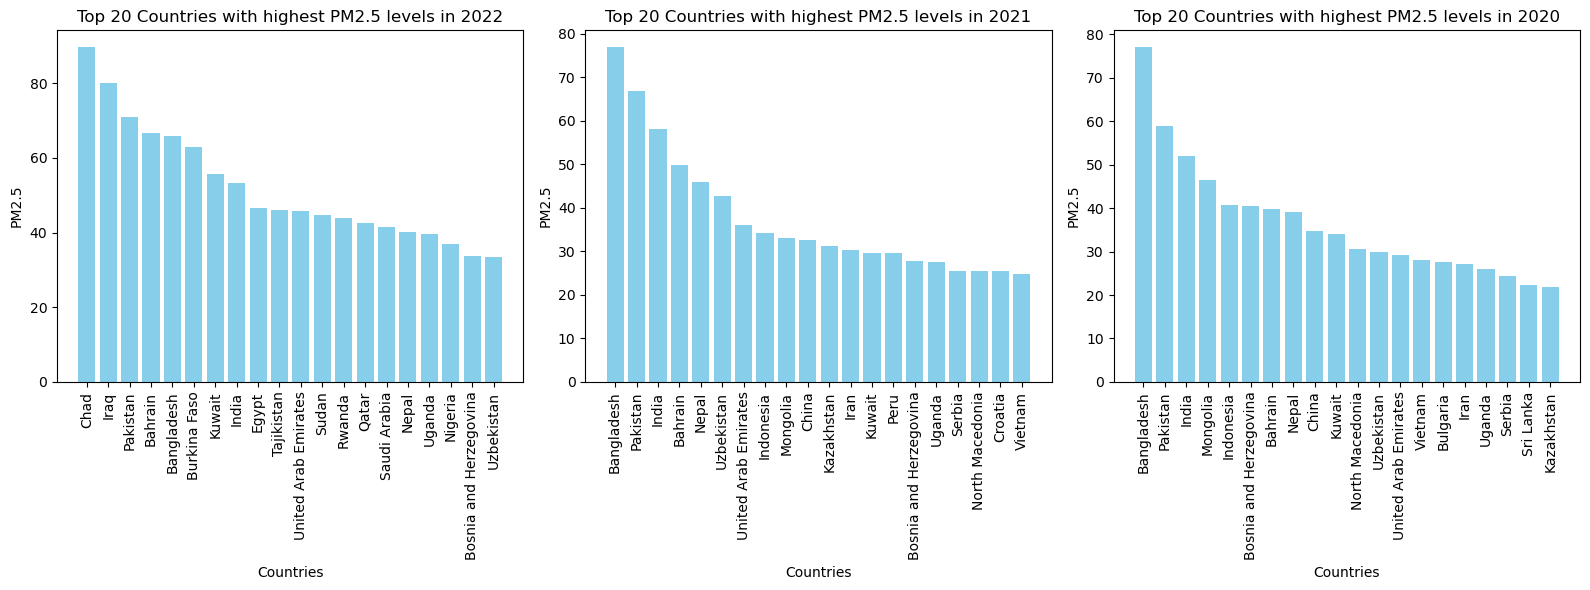

In [11]:
import matplotlib.pyplot as plt
top_polluters = pollution.nlargest(20, "2022")
# Plot setup for countries with the highest air pollution from year 2022 to 2020
#setting the size
plt.figure(figsize=(16, 6))

# Plotting distribution of top 20 polluter 2022
plt.subplot(1, 3, 1)
plt.bar(top_polluters["Country/Region"],top_polluters["2022"], color="skyblue")
plt.title("Top 20 Countries with highest PM2.5 levels in 2022")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Drop rows with Na values for the years 2018 to 2021
pollution_no_na= pollution.dropna()
# Plotting distribution of 2021
top_polluters = pollution_no_na.nlargest(20, "2021")
plt.subplot(1, 3, 2)
plt.bar(top_polluters["Country/Region"],top_polluters["2021"], color="skyblue")
plt.title("Top 20 Countries with highest PM2.5 levels in 2021")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Plotting distribution of 2020
top_polluters = pollution_no_na.nlargest(20, "2020")
plt.subplot(1, 3, 3)
plt.bar(top_polluters["Country/Region"],top_polluters["2020"], color="skyblue")
plt.title("Top 20 Countries with highest PM2.5 levels in 2020")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


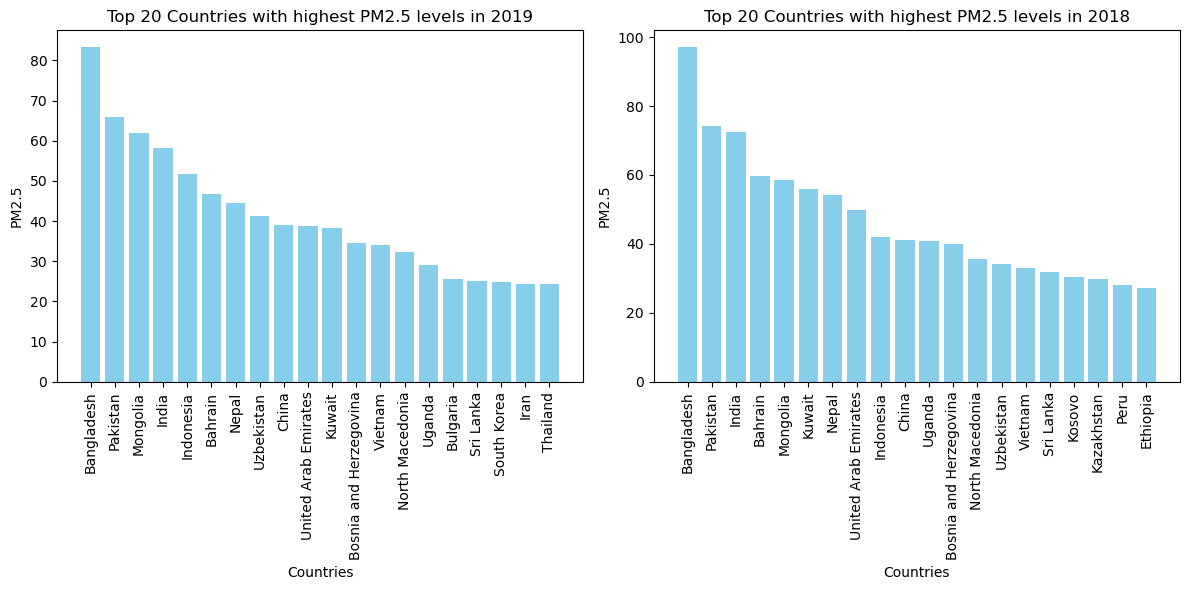

In [12]:
plt.figure(figsize=(12, 6))
# Plotting distribution of 2019
plt.subplot(1, 2, 1)
top_polluters = pollution_no_na.nlargest(20, "2019")
plt.bar(top_polluters["Country/Region"],top_polluters["2019"], color="skyblue")
plt.title("Top 20 Countries with highest PM2.5 levels in 2019")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Plotting distribution of 2018
plt.subplot(1,2,2)
top_polluters = pollution_no_na.nlargest(20, "2018")
plt.bar(top_polluters["Country/Region"],top_polluters["2018"], color="skyblue")
plt.title("Top 20 Countries with highest PM2.5 levels in 2018")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


- Now I will check the countries with the **lowest level of PM2.5**

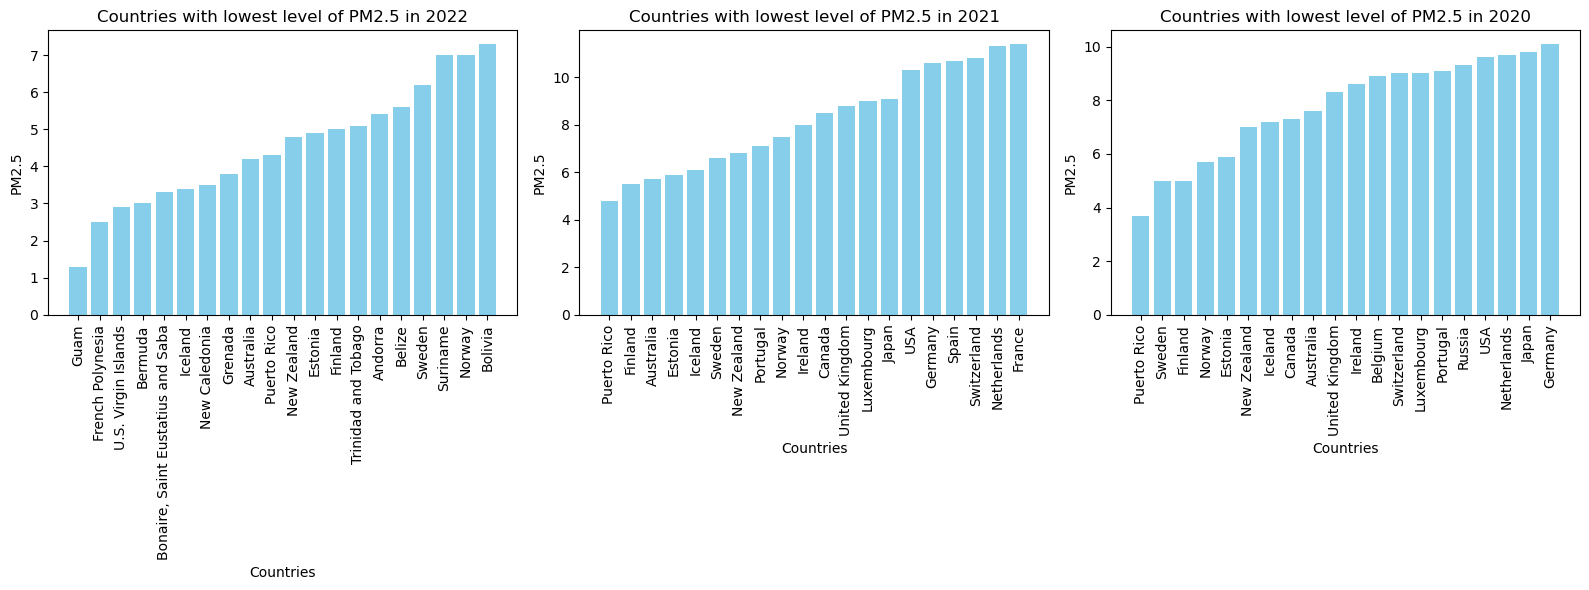

In [13]:
import matplotlib.pyplot as plt
lowest_polluters = pollution.nsmallest(20, "2022")
# Plot setup for lowest polluted countries from year 2022 to 2020
#setting the size
plt.figure(figsize=(16, 6))

# Plotting distribution of 20 countries with lowest PM2.5 level in 2022
plt.subplot(1, 3, 1)
plt.bar(lowest_polluters["Country/Region"],lowest_polluters["2022"], color="skyblue")
plt.title("Countries with lowest level of PM2.5 in 2022")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Plotting distribution of 2021
lowest_polluters = pollution_no_na.nsmallest(20, "2021")
plt.subplot(1, 3, 2)
plt.bar(lowest_polluters["Country/Region"],lowest_polluters["2021"], color="skyblue")
plt.title("Countries with lowest level of PM2.5 in 2021")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Plotting distribution of 2020
lowest_polluters = pollution_no_na.nsmallest(20, "2020")
plt.subplot(1, 3, 3)
plt.bar(lowest_polluters["Country/Region"],lowest_polluters["2020"], color="skyblue")
plt.title("Countries with lowest level of PM2.5 in 2020")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


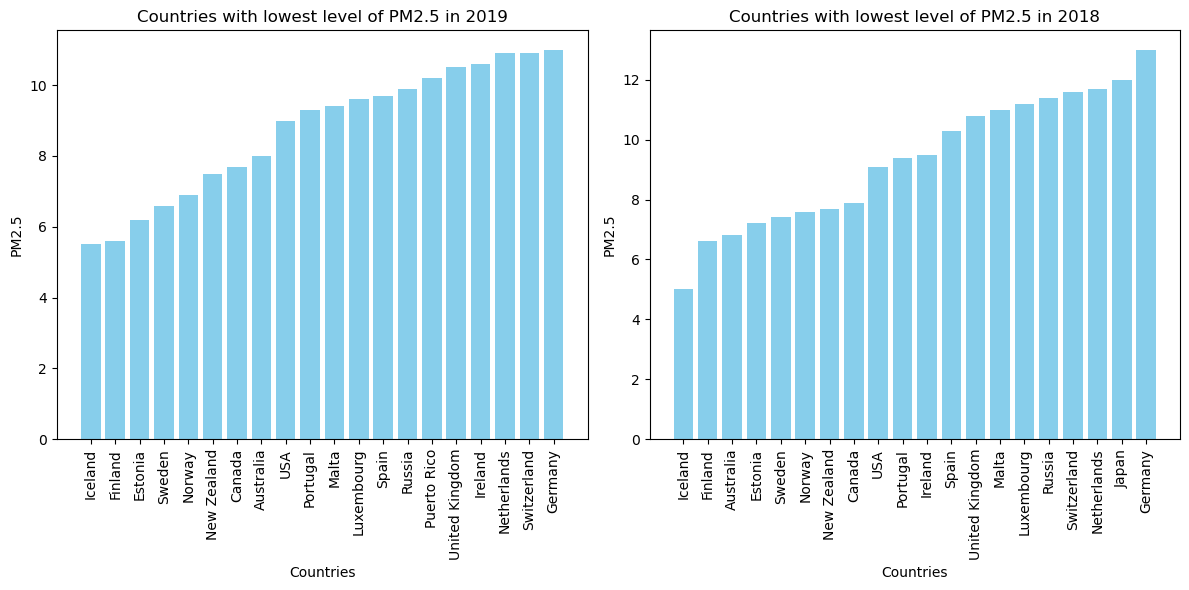

In [14]:
plt.figure(figsize=(12, 6))
# Plotting distribution of 2019
plt.subplot(1, 2, 1)
lowest_polluters = pollution_no_na.nsmallest(20, "2019")
plt.bar(lowest_polluters["Country/Region"],lowest_polluters["2019"], color="skyblue")
plt.title("Countries with lowest level of PM2.5 in 2019")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Plotting distribution of 2018
plt.subplot(1,2,2)
lowest_polluters = pollution_no_na.nsmallest(20, "2018")
plt.bar(lowest_polluters["Country/Region"],lowest_polluters["2018"], color="skyblue")
plt.title("Countries with lowest level of PM2.5 in 2018")
plt.ylabel("PM2.5")
plt.xlabel("Countries")
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

- making a scatterplot of pm2.5 levels and population

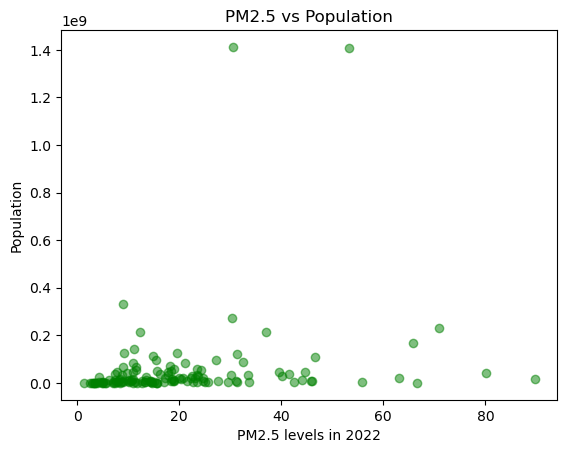

In [15]:
#try to check if there is correlation between population and worst air pollution
plt.scatter(pollution["2022"], pollution["Population"],alpha=0.5, color="green")
plt.title("PM2.5 vs Population")
plt.xlabel("PM2.5 levels in 2022")
plt.ylabel("Population")
plt.show()

The scatterplot shows that there is **no significant correlation** between higher levels of PM2.5 and very numerous popululation
- we do only see 2 very high outlier with very numerous population and very high level of air pollution

- grouping countries into continents and aggregating to check the different level of pm2.5 accros continent (from a package found on internet)

In [16]:
#found package on the internet to convert country name to continent
# Installing this package
!pip install pycountry-convert

In [17]:
import pycountry_convert as pc
def get_continent(country):
    try:
        # Get the alpha_2 code of the country
        country_alpha2 = pc.country_name_to_country_alpha2(country)
        # Get the continent code of the country
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        # Convert continent code to continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return 'Unknown'

# Applying the function to the DataFrame adding a column
pollution["Continent"] = pollution["Country/Region"].apply(get_continent)
pollution.head(10)

C:\Users\anton\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\Users\anton\anaconda3\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


,Rank,Country/Region,2022,2021,2020,2019,2018,Population,Continent
0,1,Chad,89.7,76.0,NaN,NaN,NaN,17179740,Africa
1,2,Iraq,80.1,49.7,NaN,39.6,NaN,43533592,Asia
2,3,Pakistan,70.9,66.8,59.0,65.8,74.3,231402117,Asia
3,4,Bahrain,66.6,49.8,39.7,46.8,59.8,1463265,Asia
4,5,Bangladesh,65.8,76.9,77.1,83.3,97.1,169356251,Asia
5,6,Burkina Faso,63.0,NaN,NaN,NaN,NaN,22100683,Africa
6,7,Kuwait,55.8,29.7,34.0,38.3,56.0,4250114,Asia
7,8,India,53.3,58.1,51.9,58.1,72.5,1407563842,Asia
8,9,Egypt,46.5,29.1,NaN,18.0,NaN,109262178,Africa
9,10,Tajikistan,46.0,59.4,30.9,NaN,NaN,9750064,Asia


- the warning tells me there are unknown contient 
- solving unkown continent issue

In [18]:
#checking the unkown continent countries names
unknown_continent_country_names = pollution[pollution["Continent"] == "Unknown"]["Country/Region"]

# Print the country names
print(unknown_continent_country_names)

66                          Macau, China
69                                Kosovo
71                         Hong Kong SAR
126    Bonaire, Saint Eustatius and Saba
128                  U.S. Virgin Islands
Name: Country/Region, dtype: object


In [19]:
#Assigning to the 3 countries the right continent 
pollution.loc[pollution["Country/Region"] == "Kosovo", "Continent"] = "Europe"
pollution.loc[pollution["Country/Region"] == "Macau, China", "Continent"] = "Asia"
pollution.loc[pollution["Country/Region"] == "Hong Kong SAR", "Continent"] = "Asia"


In [20]:
#dropping na for years 2018 to 2021
pollution = pollution.dropna(subset=["2018", "2019", "2020", "2021"])
mean_values_by_continent = pollution.groupby("Continent")[["2022", "2021", "2020", "2019", "2018"]].mean().reset_index()

# Display the resulting dataframe 
#I use the head function because it is visually more effective
#number is 6 because we have 6 continents
mean_values_by_continent.head(6)

,Continent,2022,2021,2020,2019,2018
0,Africa,35.450000,25.750000,20.400000,24.600000,33.950000
1,Asia,30.703846,30.384615,29.092308,34.465385,37.276923
2,Europe,12.915625,13.431250,13.850000,14.321875,15.815625
3,North America,10.025000,10.725000,9.875000,11.725000,12.750000
4,Oceania,4.500000,6.250000,7.300000,7.750000,7.250000
5,South America,18.400000,19.750000,16.750000,19.075000,20.775000


From the grouping of continent we can see that on average Africa and Asia have level way higher than Oceania, Europe and North America

## CLUSTERING 

C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

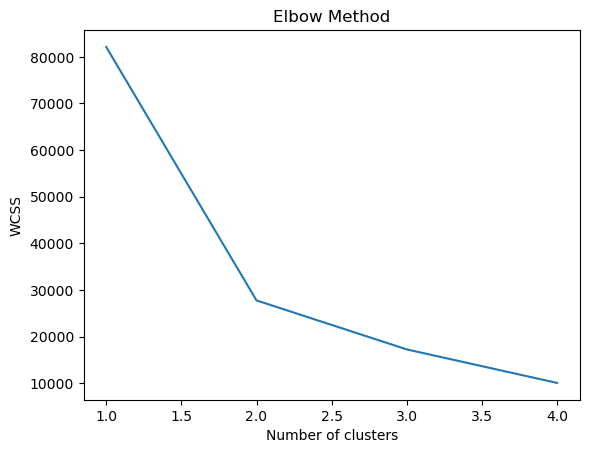

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting features for clustering
features = pollution[["2022", "2021", "2020", "2019", "2018"]]

# Normalizing the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Applying k-means clustering
# starting with the elbow method
wcss=[]
for i in range(1,5):
    kmeans=KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
#showing the elbow plot
plt.plot(range(1,5), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

- Therefore the **right number of cluster is 2**

C:\Users\anton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


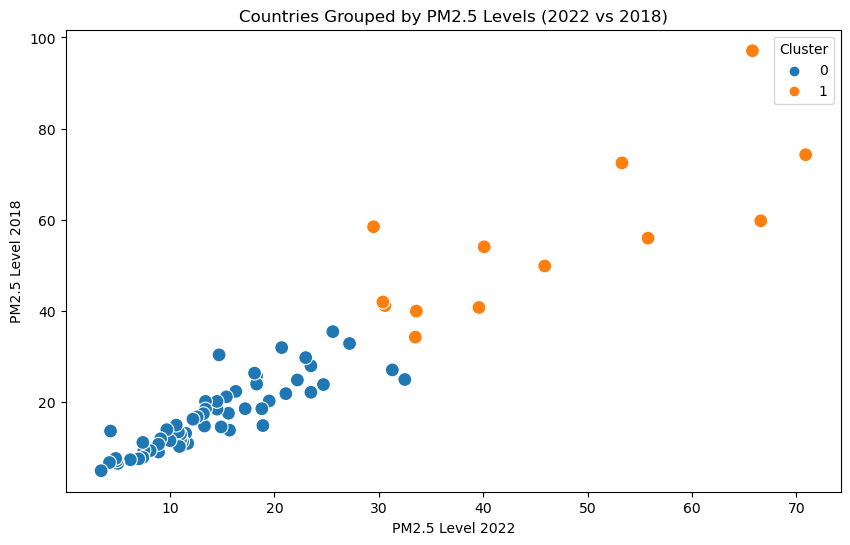

In [22]:
# right number of clusters is 2
kmeans=KMeans(n_clusters=2, init="k-means++", random_state=42)
pollution['Cluster'] = kmeans.fit_predict(normalized_features)
#Checking the result by comparing two years and see if the assignment of the cluster is optimal and correct
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pollution, x="2022", y="2018", hue="Cluster", s=100)
plt.title("Countries Grouped by PM2.5 Levels (2022 vs 2018)")
plt.xlabel("PM2.5 Level 2022")
plt.ylabel("PM2.5 Level 2018")
plt.legend(title="Cluster")
plt.show()

From the example of graph above we can see that clusters seems to fit with only a few points behind in between 
- we can clearly see that vast of majority of countries around the world have low levels of PM2.5
- only a minority of countries have PM2.5 levels way too high and put in danger the health of residents

In [23]:
#making an aggregation to check the countries and the subsequent cluster
grouped_clusters = pollution.groupby("Cluster")["Country/Region"].apply(list).reset_index()
grouped_clusters.head()

,Cluster,Country/Region
0,0,"[Iran, Ethiopia, Vietnam, North Macedonia, Ser..."
1,1,"[Pakistan, Bahrain, Bangladesh, Kuwait, India,..."


In [24]:
#checking the most pm2.5 polluted countries to see if they are assigned to the correct cluster
pollution.head(15)

,Rank,Country/Region,2022,2021,2020,2019,2018,Population,Continent,Cluster
2,3,Pakistan,70.9,66.8,59.0,65.8,74.3,231402117,Asia,1
3,4,Bahrain,66.6,49.8,39.7,46.8,59.8,1463265,Asia,1
4,5,Bangladesh,65.8,76.9,77.1,83.3,97.1,169356251,Asia,1
6,7,Kuwait,55.8,29.7,34.0,38.3,56.0,4250114,Asia,1
7,8,India,53.3,58.1,51.9,58.1,72.5,1407563842,Asia,1
10,11,United Arab Emirates,45.9,36.0,29.2,38.9,49.9,9365145,Asia,1
15,16,Nepal,40.1,46.0,39.2,44.5,54.1,30034989,Asia,1
16,17,Uganda,39.6,27.6,26.1,29.1,40.8,45853778,Africa,1
18,19,Bosnia and Herzegovina,33.6,27.8,40.6,34.6,40.0,3270943,Europe,1
19,20,Uzbekistan,33.5,42.8,29.9,41.2,34.3,34915100,Asia,1


- From the analysis it seems clear that most pm2.5 polluted countries are in Asia
- The two countries assigned to the less polluted countries have a mean and median value lower than the other so it seems right

Making a plot to show where the continents and how many countries per continent are assigned in the most polluted clusters

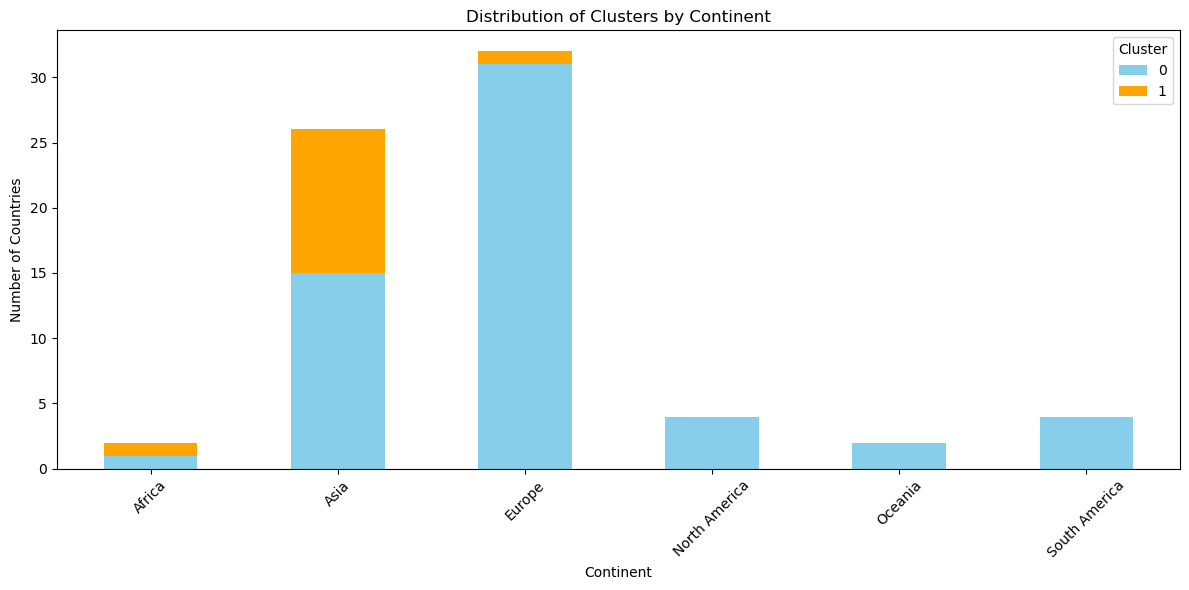

In [25]:
# Since I wanna show the number of countries belonging to the 2 clusters by continent I need to group data
#Grouping by Continent and Cluster
cluster_continent = pollution.groupby(["Continent", "Cluster"]).size().reset_index(name="Counts")

# In order to have both clusters as columns I use a pivot table
pivot_table = cluster_continent.pivot(index="Continent", columns="Cluster", values="Counts").fillna(0)

# Ploting the bar plot with clusters by continent
pivot_table.plot(kind="bar", stacked=True, figsize=(12, 6), color=["skyblue", "orange"])
plt.title("Distribution of Clusters by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Countries")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Therefore, we can see that the countries with **highest level of PM2.5 are in Asia and in Africa**, with a little part in Europe
- from the clusters we can also understand that regulation helped a lot in western country 
- Asia and Africa have less regulation around the PM2.5 level and this is reflected with the higher number of countries having levels very dangerous for the health